# Prediction of Aneurysm Rupture using k-Nearest Neighbors Classification of Computational Flow Dynamics 



## Load Data

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
data.head()


,case_id,patient_id,aneurysmLocation,aneurysmType,ruptureStatus,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,...,maxPressure,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI
0,C0001,P0085,ICA,LAT,U,53,F,False,125.259604,120.453515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0002,P0112,ICA,LAT,U,35,F,False,119.002032,122.427263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0003,P0115,ICA,TER,U,43,F,False,12.740609,23.480617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0004,P0116,ICA,TER,U,60,F,True,9.376307,18.084625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0005,P0118,ICA,LAT,R,26,F,False,37.934454,54.844592,...,7665.0,3722.28,70.275319,13.19376,0.31251,176.44,20.90888,0.0,0.44672,0.001574


## Dataset: Clinical and morphological characteristics

In [150]:
print(f'{data.columns}\n {data.shape}')

characteristics = [f'{data.columns}']

Index(['case_id', 'patient_id', 'aneurysmLocation', 'aneurysmType',
       'ruptureStatus', 'age', 'sex', 'multipleAneurysms', 'sacVolume',
       'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea',
       'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis',
       'ellipsoidMinSemiaxis', 'sacCenterlineLength', 'ostiumSectionArea',
       'ostiumSectionPerimeter', 'ostiumMinSize', 'ostiumMaxSize',
       'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star',
       'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'sacMinPressure',
       'sacMaxPressure', 'sacMeanPressure', 'sacMaxSpeed', 'sacMeanSpeed',
       'sacMinTAWSS', 'sacMaxTAWSS', 'sacMeanTAWSS', 'sacMinOSI', 'sacMaxOSI',
       'sacMeanOSI', 'vesselName', 'length', 'meanRadius', 'meanCurvature',
       'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 'maxCurvature',
       'maxTorsion', 'bifurcationAngleInPlane', 'bifurcationAngleOutOfPlane',
       'minPressure', 'maxPressure', '

In [151]:
data['multipleAneurysms'].dtypes

dtype('bool')

In [152]:
# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(data.describe())

# Display information about the data types and missing values
print("\nData types and missing values:")
print(data.info())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(data.head())

# Age ranges from 24-85 years, mean age of 54.57; 



Summary statistics for numerical columns:
              age    sacVolume  sacSurfaceArea    vdcVolume  vdcSurfaceArea  \
count  103.000000   103.000000      103.000000   103.000000      103.000000   
mean    54.572816   207.726978      145.022975   187.990480      129.519595   
std     13.779497   279.394028      133.633109   255.272818      119.365392   
min     24.000000     2.339496        7.333407     2.121879        6.495522   
25%     43.000000    38.104803       51.113444    35.284619       49.519521   
50%     55.000000    92.021799       92.777085    86.406187       83.265224   
75%     64.500000   274.308487      203.174499   245.624382      176.754502   
max     85.000000  1312.025948      625.717664  1223.412403      583.439703   

       sacSectionArea  ellipsoidVolume  ellipsoidMaxSemiaxis  \
count      103.000000       101.000000            101.000000   
mean        31.697933       137.807832              3.566692   
std         28.937416       193.676206              1

In [153]:
from scipy.stats import ttest_ind

# Define the function for the two-sample t-test
def two_sample_t_test(group1, group2):
    t_statistic, p_value = ttest_ind(group1, group2)
    return p_value

# Assuming 'data' is your DataFrame containing the dataset

# Split the dataset into "Ruptured" and "Unruptured" groups
ruptured_group = data[data['ruptureStatus'] == 'R']
unruptured_group = data[data['ruptureStatus'] == 'U']

# Define the characteristics you want to analyze
characteristics = ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 
                   'ellipsoidMinSemiaxis', 'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 
                   'sizeRatio_star', 'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature', 'meanTorsion', 
                   'tortuosity', 'minRadius', 'maxRadius', 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 'bifurcationAngleOutOfPlane', 
                 ]

# Create an empty DataFrame to store the statistics
statistics_df = pd.DataFrame(index=characteristics, columns=['Ruptured', 'Unruptured', 'P-value'])

# Calculate descriptive statistics for each characteristic in each group
for characteristic in characteristics:
    ruptured_mean = ruptured_group[characteristic].mean()
    unruptured_mean = unruptured_group[characteristic].mean()
    p_value = two_sample_t_test(ruptured_group[characteristic], unruptured_group[characteristic])
    
    # Store the statistics in the DataFrame
    statistics_df.loc[characteristic, 'Ruptured'] = ruptured_mean
    statistics_df.loc[characteristic, 'Unruptured'] = unruptured_mean
    statistics_df.loc[characteristic, 'P-value'] = p_value

# Print the statistics DataFrame
print(statistics_df)


                              Ruptured  Unruptured   P-value
age                          55.159091   54.135593   0.71118
sacVolume                   144.704696  254.726646  0.047525
sacSurfaceArea              116.709634  166.138009   0.06301
vdcVolume                   128.682415  232.220224  0.041127
vdcSurfaceArea              101.543005  150.383492   0.03934
sacSectionArea               25.575373   36.263911  0.063383
ellipsoidVolume              91.326106  172.268422       NaN
ellipsoidMaxSemiaxis          3.324626    3.746155       NaN
ellipsoidMidSemiaxis          2.214933    2.866822       NaN
ellipsoidMinSemiaxis          1.940015    2.429869       NaN
sacCenterlineLength           6.078814     6.92989  0.163781
ostiumSectionArea            16.138801   21.311721  0.060532
ostiumSectionPerimeter       13.955843   15.979478  0.061937
ostiumMinSize                 1.710087    2.067681  0.013156
ostiumMaxSize                 2.557204    2.908264  0.080476
ostiumShapeFactor       

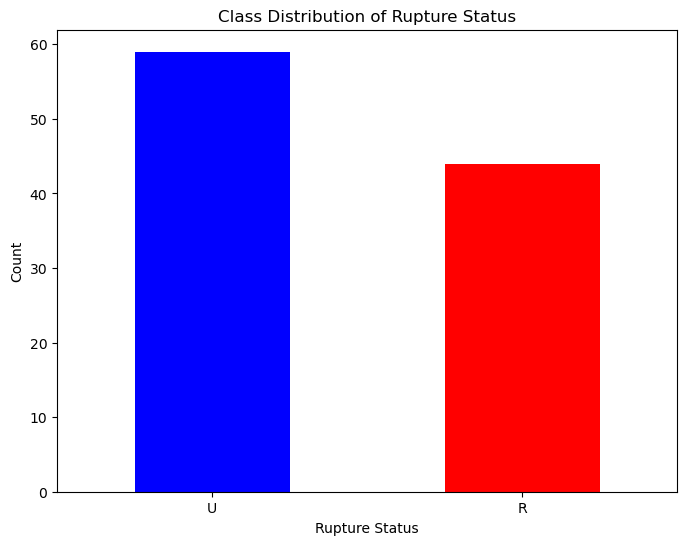

Class Counts:
ruptureStatus
U    59
R    44
Name: count, dtype: int64


In [154]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = data['ruptureStatus'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution of Rupture Status')
plt.xlabel('Rupture Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display class counts
print("Class Counts:")
print(class_counts)


In [155]:
# Calculate the number of instances in each class
num_majority = class_counts['U']
num_minority = class_counts['R']

# Calculate the imbalance ratio
imbalance_ratio = num_majority / num_minority
print("Imbalance Ratio:", imbalance_ratio)


Imbalance Ratio: 1.3409090909090908


In [156]:
df.dtypes

case_id              object
patient_id           object
aneurysmLocation     object
aneurysmType         object
ruptureStatus        object
                     ...   
maxTAWSS            float64
meanTAWSS           float64
minOSI              float64
maxOSI              float64
meanOSI             float64
Length: 62, dtype: object

## Preprocessing 


In [157]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Define the list of characteristics to be used
characteristics = ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea', 
                   'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 
                   'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                   'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 'vesselDiameter', 
                   'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature', 'meanTorsion', 
                   'tortuosity', 'minRadius', 'maxRadius', 'maxCurvature', 'maxTorsion', 
                   'bifurcationAngleInPlane', 'bifurcationAngleOutOfPlane']

# Subset the data to include only the specified characteristics
data_subset = data[characteristics + ['ruptureStatus']]

# Handle missing values
numerical_columns = data_subset.select_dtypes(include=np.number).columns
categorical_columns = data_subset.select_dtypes(exclude=np.number).columns

imputer_numerical = SimpleImputer(strategy='mean')
data_subset.loc[:, numerical_columns] = imputer_numerical.fit_transform(data_subset[numerical_columns])

imputer_categorical = SimpleImputer(strategy='most_frequent')
data_subset.loc[:, categorical_columns] = imputer_categorical.fit_transform(data_subset[categorical_columns])

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(data_subset[categorical_columns])
encoded_categorical_columns = encoder.get_feature_names_out(categorical_columns)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data_subset['ruptureStatus'])

# Replace categorical columns with encoded values
data_encoded = pd.concat([data_subset.drop(columns=categorical_columns), pd.DataFrame(encoded_categorical, columns=encoded_categorical_columns)], axis=1)

# Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Assign Data and Target Variable
X = data_scaled
y = y_encoded



In [158]:
data_encoded.columns

Index(['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea',
       'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis',
       'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength',
       'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize',
       'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star',
       'sizeRatio_star', 'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle',
       'meanRadius', 'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius',
       'maxRadius', 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane',
       'bifurcationAngleOutOfPlane', 'ruptureStatus_U'],
      dtype='object')

In [159]:
data_encoded

,age,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,ellipsoidVolume,ellipsoidMaxSemiaxis,ellipsoidMidSemiaxis,ellipsoidMinSemiaxis,...,meanCurvature,meanTorsion,tortuosity,minRadius,maxRadius,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane,ruptureStatus_U
0,53,125.259604,120.453515,111.237957,106.759273,21.938237,77.960221,3.5091,2.3718,2.2362,...,0.149981,0.218960,0.682769,0.938298,2.092899,0.513167,3.218984,76.670529,4.719235,1.0
1,35,119.002032,122.427263,113.720361,115.774279,18.493788,69.250741,4.3838,2.1032,1.7931,...,0.171728,0.226861,1.153133,1.388250,2.629028,0.532819,5.330711,116.839304,15.753911,1.0
2,43,12.740609,23.480617,11.865511,21.853480,6.142748,8.726193,1.4895,1.2775,1.0948,...,0.154458,0.265859,0.804790,1.288915,1.919531,0.299136,3.393943,123.657085,9.378066,1.0
3,60,9.376307,18.084625,9.031234,17.295395,4.905063,6.185859,1.5687,1.0935,0.8609,...,0.135058,0.240853,0.837999,1.069440,1.915735,0.296743,5.385147,129.829251,27.053597,1.0
4,26,37.934454,54.844592,35.903048,52.303479,9.729065,25.165788,2.5156,1.6261,1.4687,...,0.125326,0.249789,0.548677,0.694086,2.024693,0.355401,8.852139,117.065812,23.284114,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,43,76.340708,75.181897,73.667218,72.394490,23.546124,54.299571,2.7874,2.4975,1.8621,...,0.035592,0.580623,0.030128,1.182271,1.633734,0.100354,206.185748,142.638440,24.376264,1.0
99,67,436.828426,260.200509,406.697959,235.955139,70.007099,308.977132,5.1981,4.0872,3.4719,...,0.040250,2.902317,0.004633,1.102568,1.461093,0.122552,369.150248,170.869270,31.984847,0.0
100,84,94.271201,100.528873,90.072358,95.666266,19.046069,62.414554,3.1279,2.4120,1.9750,...,0.177326,0.423415,0.660796,1.353043,2.451011,0.530284,137.867462,124.049528,17.519173,0.0
101,59,1022.481082,466.087643,981.326431,446.253620,111.244307,776.241770,6.1279,5.9223,5.1063,...,0.017038,0.589782,0.001915,1.178609,1.467881,0.038822,67.053940,185.431347,15.662535,0.0


## Model Building and Cross-Validation

In [160]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, average_precision_score, precision_recall_curve, log_loss, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='ball_tree', p=2)

# Perform cross-validation to get accuracy scores
cv_scores = cross_val_score(knn, X, y, cv=10)

# Compute mean accuracy
mean_accuracy = np.mean(cv_scores)

# Predict target variable using cross-validation
y_pred_cv = cross_val_predict(knn, X, y, cv=10)

# Compute F1 score
f1 = f1_score(y, y_pred_cv)

# Compute precision
precision = precision_score(y, y_pred_cv)

# Compute recall
recall = recall_score(y, y_pred_cv)

# Compute average precision
average_precision = average_precision_score(y, y_pred_cv)

# Compute precision-recall curve
precision_recall_curve_vals = precision_recall_curve(y, y_pred_cv)

# Compute log loss
logloss = log_loss(y, y_pred_cv)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred_cv)

tn, fp, fn, tp = conf_matrix.ravel()

print("Mean Accuracy from Cross-Validation:", mean_accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Average Precision:", average_precision)
print("Log Loss:", logloss)
print("Confusion Matrix:\n", conf_matrix)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)
print(cv_scores)



Mean Accuracy from Cross-Validation: 0.8936363636363638
F1 Score: 0.9090909090909092
Precision: 0.8870967741935484
Recall: 0.9322033898305084
Average Precision: 0.8657895714672456
Log Loss: 3.8493222066047443
Confusion Matrix:
 [[37  7]
 [ 4 55]]
True Negatives: 37
False Positives: 7
False Negatives: 4
True Positives: 55
[0.81818182 0.81818182 1.         0.9        1.         1.
 1.         0.8        0.8        0.8       ]


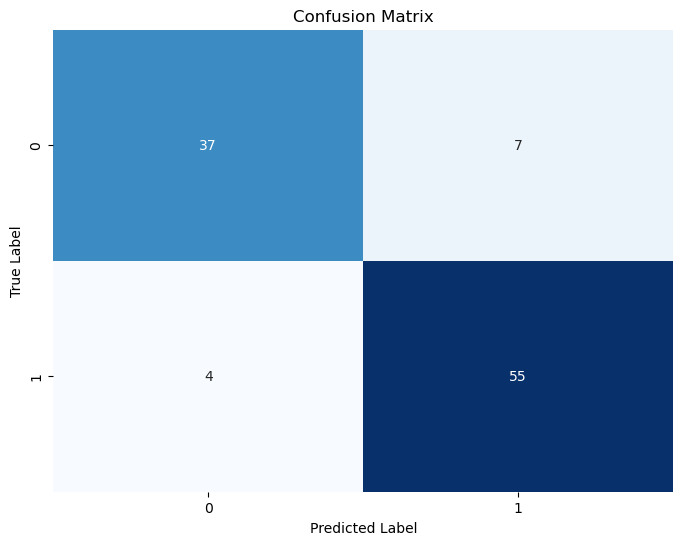

In [161]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [162]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 21],  # Values of k
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'p': [1, 2]  # Values of p for Minkowski distance
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with the KNN classifier and parameter grid
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best mean cross-validated score
print("Best Mean Accuracy:", grid_search.best_score_)


Best Parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best Mean Accuracy: 0.8936363636363638


## Receiver Operating Characteristics

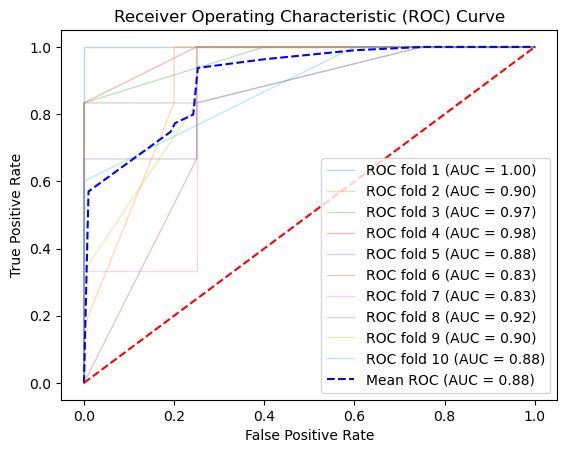

0.88


In [163]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are your feature matrix and target vector, respectively

# Initialize StratifiedKFold with 10 folds
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store fpr, tpr, and auc for each fold
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

# Iterate over each fold
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    # Split data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Compute predicted probabilities for class 1 (positive class)
    y_pred_proba = knn.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Interpolate tpr values to get fpr values at predefined mean_fpr points
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)

    # Calculate AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    aucs.append(roc_auc)

    # Plot ROC curve for each fold
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

# Plot mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(mean_fpr, mean_tpr, color='b', linestyle='--', label='Mean ROC (AUC = %0.2f)' % mean_auc)

# Plot random guess line
plt.plot([0, 1], [0, 1], color='r', linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(mean_auc)

In [164]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure SHAP is installed
# !pip install shap

# Use KernelExplainer for KNN model
explainer = shap.KernelExplainer(knn.predict_proba, X)  # Using X as background dataset

# Calculate SHAP values for the dataset
shap_values = explainer.shap_values(X)


Using 103 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/103 [00:00<?, ?it/s]

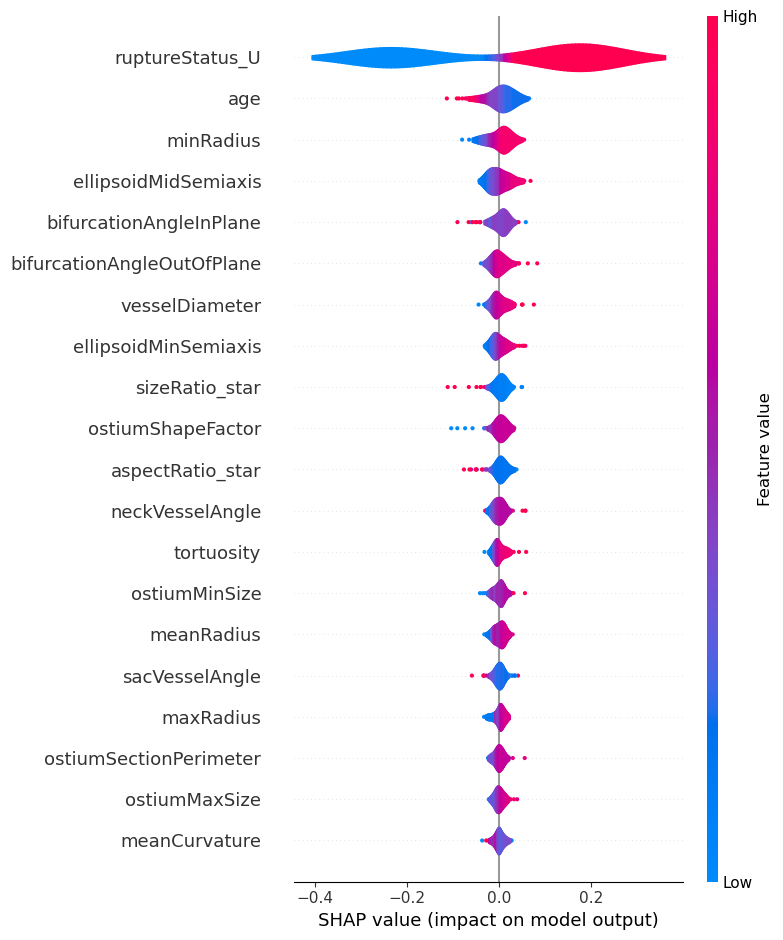

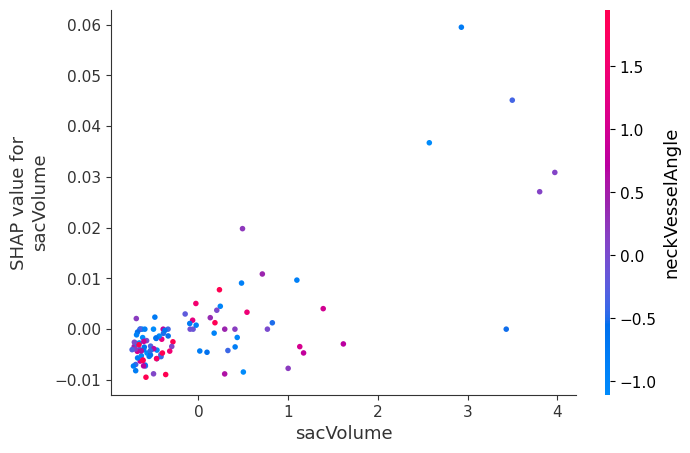

In [165]:

# Summary plot for the SHAP values
shap.summary_plot(shap_values[1], X, feature_names=data_encoded.columns, plot_type="violin")  # For positive class (rupture)

# Dependency plot for a specific feature (e.g., sacVolume)
shap.dependence_plot('sacVolume', shap_values[1], X, feature_names=data_encoded.columns)

# Force plot for a specific observation
shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], X[0, :], feature_names=data_encoded.columns)


In [166]:
df.columns

Index(['case_id', 'patient_id', 'aneurysmLocation', 'aneurysmType',
       'ruptureStatus', 'age', 'sex', 'multipleAneurysms', 'sacVolume',
       'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea',
       'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis',
       'ellipsoidMinSemiaxis', 'sacCenterlineLength', 'ostiumSectionArea',
       'ostiumSectionPerimeter', 'ostiumMinSize', 'ostiumMaxSize',
       'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star',
       'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'sacMinPressure',
       'sacMaxPressure', 'sacMeanPressure', 'sacMaxSpeed', 'sacMeanSpeed',
       'sacMinTAWSS', 'sacMaxTAWSS', 'sacMeanTAWSS', 'sacMinOSI', 'sacMaxOSI',
       'sacMeanOSI', 'vesselName', 'length', 'meanRadius', 'meanCurvature',
       'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 'maxCurvature',
       'maxTorsion', 'bifurcationAngleInPlane', 'bifurcationAngleOutOfPlane',
       'minPressure', 'maxPressure', '

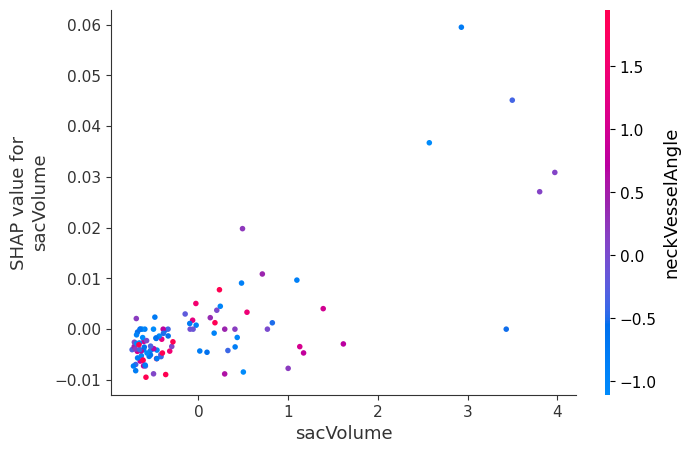

In [167]:
# Dependency plot for a specific feature (e.g., sacVolume)
shap.dependence_plot('sacVolume', shap_values[1], X, feature_names=data_encoded.columns)


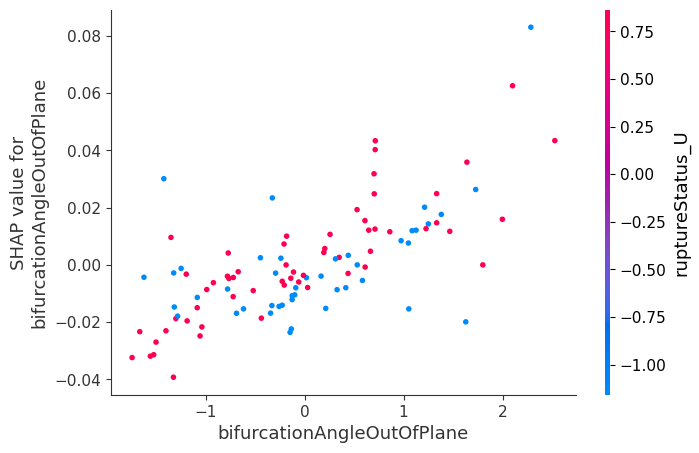

In [168]:
# Dependency plot for a specific feature (e.g., sacVolume)
shap.dependence_plot('bifurcationAngleOutOfPlane', shap_values[1], X, feature_names=data_encoded.columns)


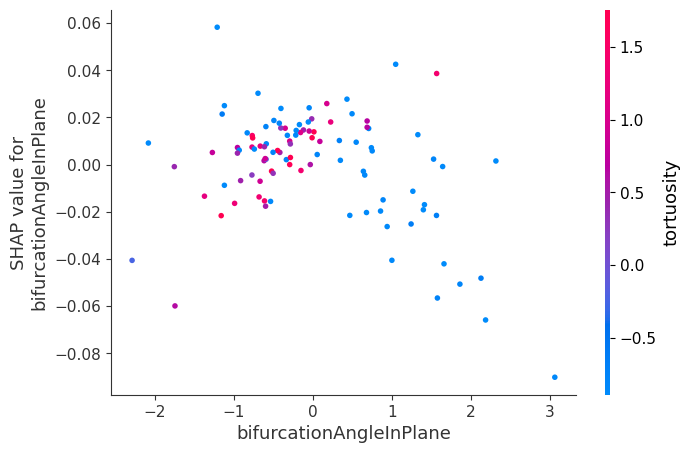

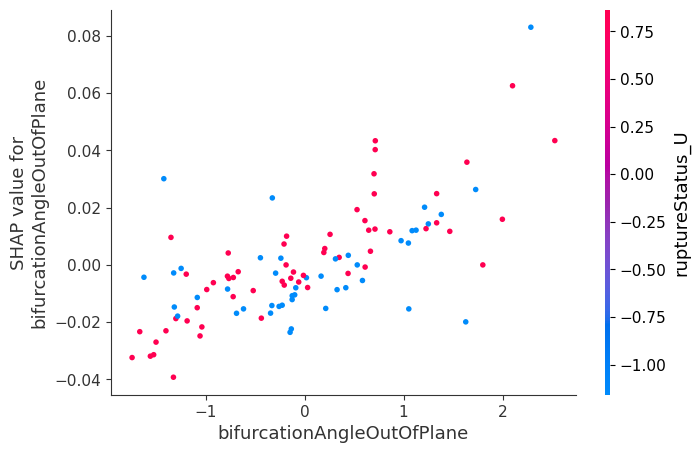

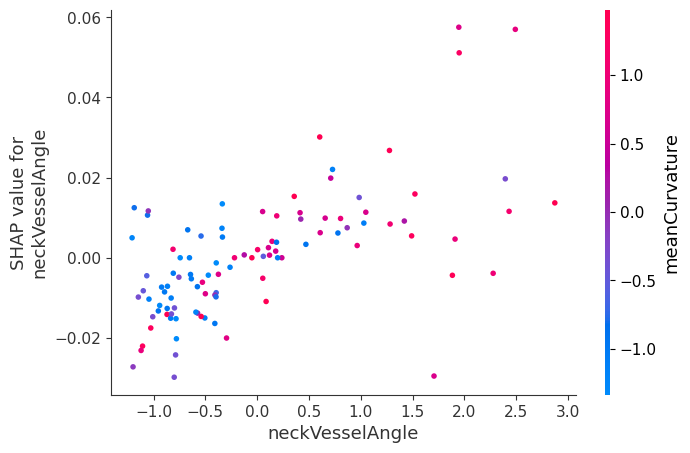

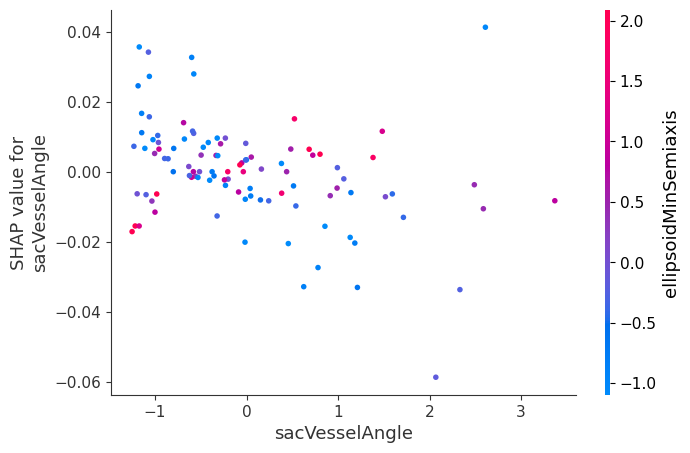

In [169]:
# SHAP dependency plots for bifurcation angles
shap.dependence_plot('bifurcationAngleInPlane', shap_values[1], X, feature_names=data_encoded.columns)
shap.dependence_plot('bifurcationAngleOutOfPlane', shap_values[1], X, feature_names=data_encoded.columns)
shap.dependence_plot('neckVesselAngle', shap_values[1], X, feature_names=data_encoded.columns)
shap.dependence_plot('sacVesselAngle', shap_values[1], X, feature_names=data_encoded.columns)


In [175]:
# Check the statistics of the original angle columns to understand their range
angle_columns = [
    'bifurcationAngleInPlane',
    'bifurcationAngleOutOfPlane',
    'neckVesselAngle',
    'sacVesselAngle'
]

# Descriptive statistics for the angle columns
data[angle_columns].describe()


,bifurcationAngleInPlane,bifurcationAngleOutOfPlane,neckVesselAngle,sacVesselAngle
count,103.000000,103.000000,103.000000,103.000000
mean,124.941757,20.058769,38.138339,40.202558
std,27.790898,9.896768,30.959661,31.860618
min,61.651005,2.903025,0.961829,0.561933
25%,107.204839,12.493163,13.523924,16.691275
50%,118.960926,18.823877,27.691740,32.863060
75%,143.840369,26.780391,56.821893,57.042076
max,209.673523,44.934416,126.649505,146.971872


In [ ]:
# Retrieve scaling parameters directly for each feature to verify the transformation logic
scaling_parameters = {
    angle: (scaler.data_min_[i], scaler.data_max_[i])
    for i, angle in enumerate(angle_columns)
}

scaling_parameters



{'bifurcationAngleInPlane': [-234.39403056460003,
  -86.37151287240002,
  61.6510048198,
  209.673522512,
  357.6960402042,
  505.7185578964],
 'bifurcationAngleOutOfPlane': [-81.15975577721998,
  -39.12836522837999,
  2.90302532046,
  44.9344158693,
  86.96580641813999,
  128.99719696697997],
 'neckVesselAngle': [-250.413520768334,
  -124.725845649556,
  0.961829469222,
  126.649504588,
  252.33717970677802,
  378.024854825556],
 'sacVesselAngle': [-292.25794579104,
  -145.84800657736002,
  0.56193263632,
  146.97187185,
  293.38181106368006,
  439.7917502773601]}

In [178]:
# Correct reverse normalization based on individual min-max scaling parameters
def reverse_min_max_scaling(normalized_values, data_min, data_max):
    return [val * (data_max - data_min) + data_min for val in normalized_values]

# Normalized SHAP plot range (-2 to 3)
normalized_range = [-2, -1, 0, 1, 2, 3]

# Map back for each angle feature
original_degrees = {
    angle: reverse_min_max_scaling(normalized_range, *scaling_parameters[angle])
    for angle in angle_columns
}

original_degrees


{'bifurcationAngleInPlane': [-234.39403056460003,
  -86.37151287240002,
  61.6510048198,
  209.673522512,
  357.6960402042,
  505.7185578964],
 'bifurcationAngleOutOfPlane': [-81.15975577721998,
  -39.12836522837999,
  2.90302532046,
  44.9344158693,
  86.96580641813999,
  128.99719696697997],
 'neckVesselAngle': [-250.413520768334,
  -124.725845649556,
  0.961829469222,
  126.649504588,
  252.33717970677802,
  378.024854825556],
 'sacVesselAngle': [-292.25794579104,
  -145.84800657736002,
  0.56193263632,
  146.97187185,
  293.38181106368006,
  439.7917502773601]}

## Additional Characteristics: Bias-Variance Tradeoff and Decision Boundaries